In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.collections import PathCollection
import os

In [2]:
plt.rcParams['figure.figsize'] = 7,7
plt.rcParams['axes.linewidth'] = 2.0
plt.rcParams['savefig.dpi'] = 500
plt.rcParams['pdf.fonttype'] = 42
plt.rcParams['ps.fonttype'] = 42
np.set_printoptions(legacy='1.25')
pd.set_option('display.max_rows', None, 'display.max_columns', None)

# Amphiscan 12 protiens

### Import Data

In [3]:
os.chdir('/home/cadeniran/u1/Amphiscan-prot')
data12 = pd.read_csv("rmsd_values.csv", header=None, sep=',', engine='python', names=['ID', 'RMSD', 'z_increment', 'pert_num'])

In [4]:
# Print the avg RMSD
data12.loc[:, 'RMSD'].mean().round(2)

15.71

### Boxplot 12 proteins

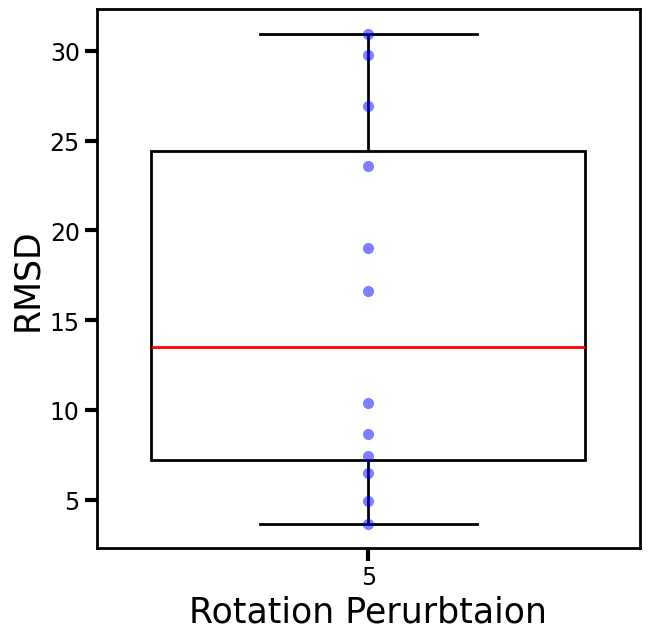

In [5]:
PROPS = {'boxprops':{'facecolor':'none', 'edgecolor':'black'},
        'medianprops':{'color':'red'},
        'whiskerprops':{'color':'black'},
        'capprops':{'color':'black'}}

ax = sns.boxplot(x="pert_num", y="RMSD", data=data12, showfliers = True, linewidth=2, **PROPS)
ax = sns.swarmplot(x="pert_num", y="RMSD", data=data12, color="blue", alpha=0.5, size=8)

plt.xlabel("Rotation Perurbtaion", fontsize=25)
plt.ylabel("RMSD", fontsize=25)
plt.tick_params(axis='both', labelsize='17', length=9, width=3)

plt.savefig("/home/cadeniran/ipn/figs/prot12boxplotafter.png", transparent=True, bbox_inches='tight')

# Amphiscan 64 proteins

### Import data

In [6]:
os.chdir('/home/cadeniran/u1/amphiscan-64prot')
data64before = pd.read_csv("rmsd_values.csv", header=None, sep=',', engine='python', names=['ID', 'RMSD', 'z_increment', 'pert_num'])
#Drop data for 2x3v (outlier)
data64before.drop([48], inplace=True)

In [7]:
# Print the avg RMSD
data64before.loc[:, 'RMSD'].mean().round(2)

14.51

### Box plot

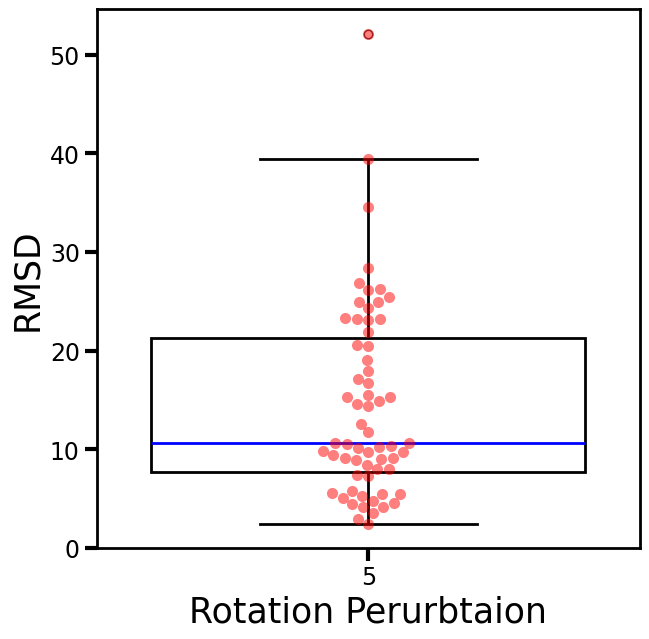

In [8]:
PROPS = {'boxprops':{'facecolor':'none', 'edgecolor':'black'},
        'medianprops':{'color':'blue'},
        'whiskerprops':{'color':'black'},
        'capprops':{'color':'black'}}

ax = sns.boxplot(x="pert_num", y="RMSD", data=data64before, showfliers = True, linewidth=2, **PROPS)
ax = sns.swarmplot(x="pert_num", y="RMSD", data=data64before, color="r", alpha=0.5, size=8)

plt.xlabel("Rotation Perurbtaion", fontsize=25)
plt.ylabel("RMSD", fontsize=25)
plt.tick_params(axis='both', labelsize='17', length=9, width=3)

In [ ]:
Boxplot after testrmsd.py changes.

In [5]:
os.chdir('/home/cadeniran/u1/amphiscan-64prot')
data64after = pd.read_csv("rmsd_values.csv", header=None, sep=',', engine='python', names=['ID', 'RMSD', 'z_increment', 'pert_num'])
#Drop data for 2x3v (outlier)
#data64after.drop([19], inplace=True)
#data64after.drop([16], inplace=True)

In [6]:
# Print the avg RMSD
data64after.loc[:, 'RMSD'].mean().round(2)

10.72

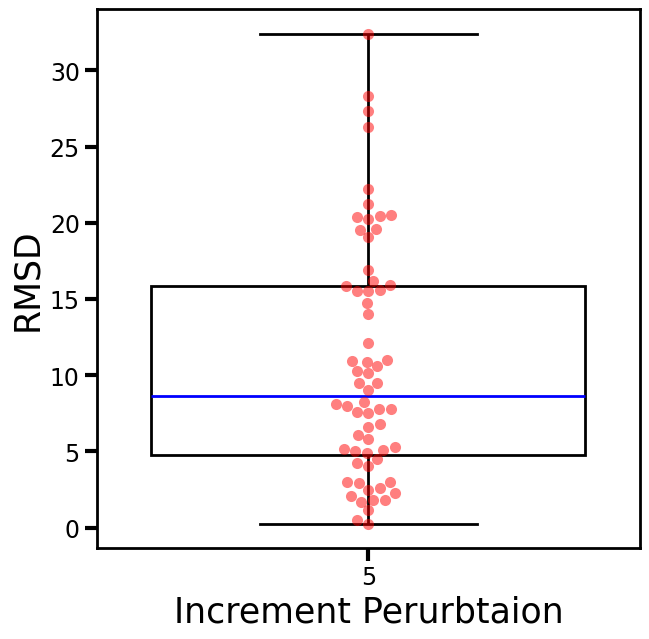

In [8]:
PROPS = {'boxprops':{'facecolor':'none', 'edgecolor':'black'},
        'medianprops':{'color':'blue'},
        'whiskerprops':{'color':'black'},
        'capprops':{'color':'black'}}

ax = sns.boxplot(x="pert_num", y="RMSD", data=data64after, showfliers = True, linewidth=2, **PROPS)
ax = sns.swarmplot(x="pert_num", y="RMSD", data=data64after, color="r", alpha=0.5, size=8)

plt.xlabel("Increment Perurbtaion", fontsize=25)
plt.ylabel("RMSD", fontsize=25)
plt.tick_params(axis='both', labelsize='17', length=9, width=3)
plt.savefig("/home/cadeniran/ipn/figs/protboxplot.png", transparent=True, bbox_inches='tight')

In [16]:
# Combine 12 & 64 prot data
all_prot = pd.DataFrame({'12p_5_1': data12["RMSD"],
                        '64p_5_1 Prev': data64before["RMSD"],
                        '64p_5_1 New': data64after["RMSD"]})

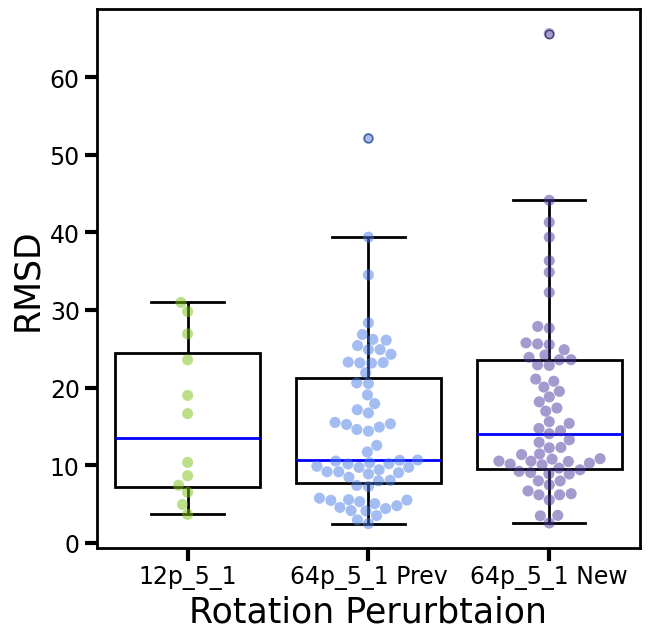

In [18]:
PROPS = {'boxprops':{'facecolor':'none', 'edgecolor':'black'},
        'medianprops':{'color':'blue'},
        'whiskerprops':{'color':'black'},
        'capprops':{'color':'black'}}
colors = ['#79c314', '#487de7', '#4b369d',]

ax = sns.boxplot(data=all_prot, showfliers = True, linewidth=2, **PROPS)
ax = sns.swarmplot(data=all_prot, palette=colors, alpha=0.5, size=8)

plt.xlabel("Rotation Perurbtaion", fontsize=25)
plt.ylabel("RMSD", fontsize=25)
plt.tick_params(axis='both', labelsize='17', length=9, width=3)

plt.savefig("/home/cadeniran/ipn/figs/allprotboxplot.png", transparent=True, bbox_inches='tight')